In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [42]:
class LocallyWeightedRegression:
    #maths behind Linear Regression:
    # theta = inv(X.T*W*X)*(X.T*W*Y)this will be our theta whic will 
    # be learnt for each point
    # initializer of LocallyWeighted Regression that stores tau as parameters
    def __init__(self, tau = 0.01):
        self.tau = tau
    def kernel(self, query_point, X):
        Weight_matrix = np.mat(np.eye(len(X)))
        for idx in range(len(X)):
            Weight_matrix[idx,idx] = np.exp(np.dot(X[idx]-query_point, (X[idx]-query_point).T)/(-2*self.tau*self.tau))
        return Weight_matrix
    # function that makes the predictions of the output of a given query point
    def predict(self, X, Y, query_point):
        q = np.mat([query_point, 1])
        X = np.hstack((X, np.ones((len(X), 1))))
        W = self.kernel(q, X)
        theta = np.linalg.pinv(X.T*(W*X))*(X.T*(W*Y))
        pred = np.dot(q, theta)
        return pred
    #function that fits and predicts the output of all query points
    def fit_and_predict(self, X, Y):
        Y_test, X_test = [], np.linspace(-np.max(X), np.max(X), len(X))
        for x in X_test:
            pred = self.predict(X, Y, x)
            Y_test.append(pred[0][0])
        Y_test = np.array(Y_test)
        return Y_test
    # function that computes the score rmse
    def score(self, Y, Y_pred):
        return np.sqrt(np.mean((Y-Y_pred)**2))
    # function that fits as well as shows the scatter plot of all points
    def fit_and_show(self, X, Y):
        Y_test, X_test = [], np.linspace(-np.max(X), np.max(X), len(X))
        for x in X_test:
            pred = self.predict(X, Y, x)
            Y_test.append(pred[0][0])
        Y_test = np.array(Y_test)
        plt.style.use('seaborn')
        plt.title("The scatter plot for the value of tau = %.5f"% self.tau)
        plt.scatter(X, Y, color = 'red')
        plt.scatter(X_test, Y_test, color = 'green')
        plt.show()

In [43]:
# reading the csv files of the given dataset
dfx = pd.read_csv('./weightedX.csv')
dfy = pd.read_csv('./weightedY.csv')

In [44]:
# store the values of dataframes in numpy arrays
X = dfx.values
Y = dfy.values

In [58]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)
print(y_train[2])

[2.3377]


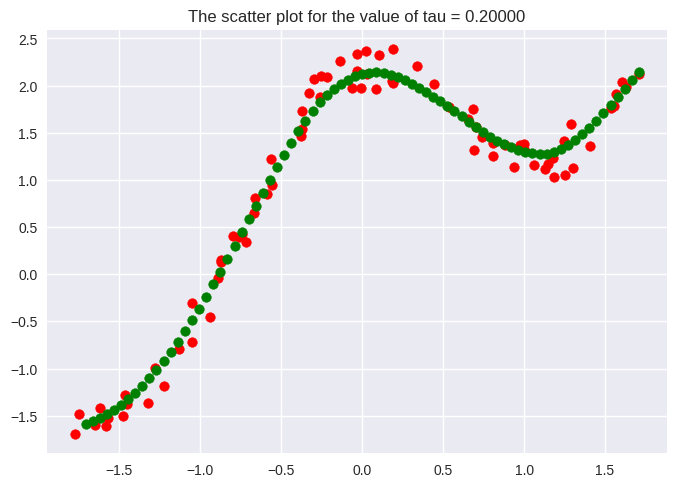

In [59]:
# normalising the data values
u = X_train.mean()
std = X_train.std()
X_train = ((X_train-u)/std)
tau = 0.2
model = LocallyWeightedRegression(tau)
Y_pred = model.fit_and_predict(X_train, y_train)
model.fit_and_show(X_train, y_train)

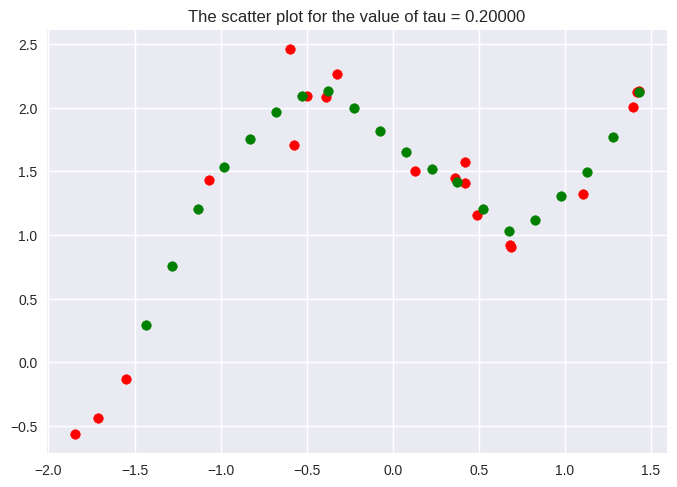

In [60]:
# normalising the data values
u = X_test.mean()
std = X_test.std()
X_test = ((X_test-u)/std)
tau = 0.2
model = LocallyWeightedRegression(tau)
Y_pred_test = model.fit_and_predict(X_test, y_test)
model.fit_and_show(X_test, y_test)

In [62]:


# from sklearn.metrics import accuracy_score
# training_score = accuracy_score(y_train,Y_pred)
# testting_score = accuracy_score(y_test,Y_pred_test)

Y_Pred_test2 = []

for x in Y_pred_test:
    Y_Pred_test2.append(x[0])

Y_Pred_test2 = np.array(Y_Pred_test2)
# print(Y_Pred_test2)


import math

from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(y_test, Y_Pred_test2))
print(rmse)

0.9018417705725258
